# Unsupervised Machine Learning - Clustering

#### Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

import math
import statistics

## Level 1

### Exercise 1

#### Classification of flights with K-means

Classification model for one airline - Delta Air Lines.

In [5]:
df = pd.read_csv("DelayedFlights.csv")
df.head(3)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.936758e+06,1936758.0,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936758e+06,1.936758e+06,...,1.936758e+06,1.929648e+06,1.936303e+06,1.936758e+06,1.936758e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06
mean,3.341651e+06,2008.0,6.111106e+00,1.575347e+01,3.984827e+00,1.518534e+03,1.467473e+03,1.610141e+03,1.634225e+03,2.184263e+03,...,7.656862e+02,6.812975e+00,1.823220e+01,3.268348e-04,4.003598e-03,1.917940e+01,3.703571e+00,1.502164e+01,9.013714e-02,2.529647e+01
std,2.066065e+06,0.0,3.482546e+00,8.776272e+00,1.995966e+00,4.504853e+02,4.247668e+02,5.481781e+02,4.646347e+02,1.944702e+03,...,5.744797e+02,5.273595e+00,1.433853e+01,1.807562e-02,6.314722e-02,4.354621e+01,2.149290e+01,3.383305e+01,2.022714e+00,4.205486e+01
min,0.000000e+00,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.517452e+06,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,6.100000e+02,...,3.380000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.242558e+06,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,1.543000e+03,...,6.060000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,4.972467e+06,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,3.422000e+03,...,9.980000e+02,8.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,7.009727e+06,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.742000e+03,...,4.962000e+03,2.400000e+02,4.220000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


In [9]:
#selecting 
df_flights = df.loc[df['UniqueCarrier'] == 'DL']

In [10]:
#clean the data, feature I will not use, for clustering I will select only numeric features
df_flights.drop(['Unnamed: 0','Year','FlightNum','TailNum','CancellationCode','UniqueCarrier'],axis=1, inplace=True)

In [11]:
df_flights.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime',
       'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn',
       'TaxiOut', 'Cancelled', 'Diverted', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [12]:
#dealing fith cathegorical variables 'Origin', 'Dest'
cat_df_flights = df_flights.select_dtypes(include=['object']).copy()
print(cat_df_flights.isnull().values.sum())#do I have some null values?

0


In [13]:
#list of all airports
first_list = cat_df_flights['Origin'].tolist()
second_list = cat_df_flights['Dest'].tolist()
resultList= list(set(first_list) | set(second_list))
print(resultList)

['STL', 'GSO', 'LIH', 'PWM', 'JAN', 'FLL', 'MSY', 'OGG', 'ATL', 'SLC', 'MTJ', 'GPT', 'LEX', 'MIA', 'PNS', 'IND', 'SMF', 'CHS', 'DAB', 'SDF', 'JFK', 'GEG', 'CLE', 'SJU', 'ROC', 'IAH', 'TYS', 'PHX', 'BOS', 'BZN', 'SFO', 'VPS', 'ONT', 'TUS', 'BUF', 'CMH', 'DCA', 'CAE', 'BHM', 'FCA', 'STX', 'DFW', 'RDU', 'DTW', 'SNA', 'BOI', 'ORD', 'MEM', 'OKC', 'PHF', 'LAX', 'MCI', 'PHL', 'GSP', 'MCO', 'ORF', 'RIC', 'SAV', 'MOB', 'HNL', 'MKE', 'OAK', 'SAN', 'RSW', 'CLT', 'MSP', 'LGA', 'EGE', 'ANC', 'DAY', 'RNO', 'IAD', 'BNA', 'STT', 'JAX', 'CAK', 'PIT', 'JAC', 'SAT', 'ABQ', 'LAS', 'AUS', 'TPA', 'MLB', 'SRQ', 'CVG', 'COS', 'LIT', 'BWI', 'HDN', 'DEN', 'PDX', 'SJC', 'HSV', 'FAI', 'TLH', 'GUC', 'EWR', 'PBI', 'ELP', 'BDL', 'SEA', 'HOU', 'KOA']


In [14]:
labels = resultList
replace_map1 = {'Origin' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
replace_map2 = {'Dest' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

In [15]:
#apply map to columns Origin and Dest, numbers assigned to airports are the same in both columns
df_flights.replace(replace_map1, inplace=True)
df_flights.replace(replace_map2, inplace=True)
print(df_flights['Origin'],df_flights['Dest'])

95860      89
95861       9
95862      53
95863      81
95864      10
           ..
1936753    66
1936754    57
1936755     9
1936756    72
1936757    79
Name: Origin, Length: 114238, dtype: int64 95860       9
95861      14
95862       9
95863      10
95864      89
           ..
1936753     9
1936754     9
1936755    26
1936756     9
1936757     9
Name: Dest, Length: 114238, dtype: int64


In [16]:
#missing data?
df_flights.isnull().sum()

Month                    0
DayofMonth               0
DayOfWeek                0
DepTime                  0
CRSDepTime               0
ArrTime                426
CRSArrTime               0
ActualElapsedTime      510
CRSElapsedTime           0
AirTime                510
ArrDelay               510
DepDelay                 0
Origin                   0
Dest                     0
Distance                 0
TaxiIn                 426
TaxiOut                 17
Cancelled                0
Diverted                 0
CarrierDelay         41986
WeatherDelay         41986
NASDelay             41986
SecurityDelay        41986
LateAircraftDelay    41986
dtype: int64

In [17]:
#calculating mean value for missing data
def myfunc(x):
    df_flights[x]=df_flights[x].fillna(df_flights[x].mean())

mylist = ['ArrTime','ActualElapsedTime','AirTime','ArrDelay',
          'TaxiIn','TaxiOut','CarrierDelay','WeatherDelay',
          'NASDelay','SecurityDelay','LateAircraftDelay']
for x in mylist:
    myfunc(x)

In [18]:
df_flights.head(3)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
95860,1,15,2,1731.0,1725,1921.0,1934,110.0,129.0,90.0,...,576,5.0,15.0,0,0,19.531916,2.313071,16.832724,0.018892,22.146903
95861,1,15,2,1227.0,1210,1425.0,1358,118.0,108.0,82.0,...,595,8.0,28.0,0,0,17.000000,0.000000,10.000000,0.000000,0.000000
95862,1,15,2,1001.0,954,1222.0,1227,141.0,153.0,104.0,...,665,5.0,32.0,0,0,19.531916,2.313071,16.832724,0.018892,22.146903


#### Test sample

In [19]:
#standartization
scaler = StandardScaler()
dfScaled = df_flights.copy()
dfScaled[dfScaled.columns] = scaler.fit_transform(dfScaled[dfScaled.columns])
dfScaled.head(3)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
95860,-1.616416,-0.089056,-1.017683,0.470116,0.584210,0.523789,0.590595,-0.628063,-0.398670,-0.507976,...,-0.565011,-0.593653,-0.49161,-0.01356,-0.065566,-1.048705e-16,-3.581207e-17,0.000000,0.000000,0.000000
95861,-1.616416,-0.089056,-1.017683,-0.614940,-0.589394,-0.381135,-0.669609,-0.534841,-0.643516,-0.604552,...,-0.537663,-0.129618,0.30779,-0.01356,-0.065566,-7.473814e-02,-1.865298e-01,-0.264767,-0.021751,-0.710433
95862,-1.616416,-0.089056,-1.017683,-1.101493,-1.172777,-0.751497,-0.956218,-0.266827,-0.118846,-0.338969,...,-0.436904,-0.593653,0.55376,-0.01356,-0.065566,-1.048705e-16,-3.581207e-17,0.000000,0.000000,0.000000


In [30]:
#simple random sample
df_sample = dfScaled.sample(n = 100)

In [31]:
df_sample.head(3)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
569947,-1.037549,-0.893490,0.974453,1.346342,1.345343,-2.907990,-3.572891,2.308436,2.667734,2.268576,...,2.168417,0.489095,0.430775,-0.01356,-0.065566,-1.048705e-16,-3.581207e-17,0.000000,0.000000,0.000000
1479776,0.699054,0.945216,-0.519649,-1.043365,-1.191008,-0.791635,-1.212197,-0.837813,-0.923340,-0.942567,...,-0.881680,-0.284297,0.492267,-0.01356,-0.065566,6.632222e-01,-1.865298e-01,-0.342267,-0.021751,-0.710433
1843691,1.567355,1.634731,-1.017683,0.642347,0.764238,0.870433,0.964718,-0.511535,-0.491944,-0.495904,...,-0.398041,1.262486,-0.676087,-0.01356,-0.065566,-1.048705e-16,-3.581207e-17,0.000000,0.000000,0.000000


In [32]:
#KMeans
model1 = KMeans(init="random",n_clusters=4,n_init=10,max_iter=300,random_state=42)
model1.fit(df_sample)

KMeans(init='random', n_clusters=4, random_state=42)

In [33]:
#the lowest SSE value
model1.inertia_

1172.694744125836

In [34]:
#final locations of centroids
centers1 = model1.cluster_centers_
centers1

array([[ 1.57938780e-01, -3.53869401e-01, -2.16497844e-01,
        -3.41616776e-01, -3.53483972e-01, -1.01043610e-01,
        -2.90349375e-01,  1.05145658e+00,  1.02224775e+00,
         1.07870027e+00, -2.18571423e-01, -2.85353262e-01,
         4.80089627e-02, -1.54586895e-01,  1.08560964e+00,
        -8.25424085e-02,  8.58829745e-02, -1.35595187e-02,
        -6.55662939e-02, -1.78366601e-01,  7.46949562e-02,
         7.83575573e-02, -1.41856826e-02, -3.09908547e-01],
       [ 1.92544994e-01,  2.14658955e-01, -2.70631972e-01,
         8.50254949e-01,  8.95271746e-01,  8.49907994e-01,
         8.35009330e-01, -6.02676359e-01, -5.87717429e-01,
        -6.15330610e-01, -2.13439488e-01, -2.02486478e-01,
         3.33420294e-02,  1.24723030e-01, -5.97809320e-01,
        -1.18569952e-01,  3.28401373e-04, -1.35595187e-02,
        -6.55662939e-02, -1.34425435e-01, -5.78642438e-03,
        -3.50459391e-02, -1.24293600e-02, -1.14966596e-01],
       [-9.86536362e-02,  1.60402724e-01, -1.30939515e

In [35]:
#number of iterations required to converge
model1.n_iter_

8

In [36]:
a = model1.labels_
a

array([3, 2, 1, 2, 2, 0, 2, 0, 0, 1, 2, 2, 0, 0, 1, 2, 2, 0, 1, 1, 3, 2,
       1, 1, 2, 1, 1, 2, 0, 0, 0, 2, 0, 1, 2, 2, 1, 1, 1, 0, 1, 2, 3, 2,
       2, 0, 1, 2, 2, 0, 3, 2, 2, 2, 3, 2, 1, 1, 0, 1, 2, 2, 1, 1, 0, 2,
       0, 2, 2, 2, 2, 3, 1, 0, 0, 3, 1, 2, 1, 2, 2, 0, 1, 1, 1, 2, 0, 3,
       2, 1, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1], dtype=int32)

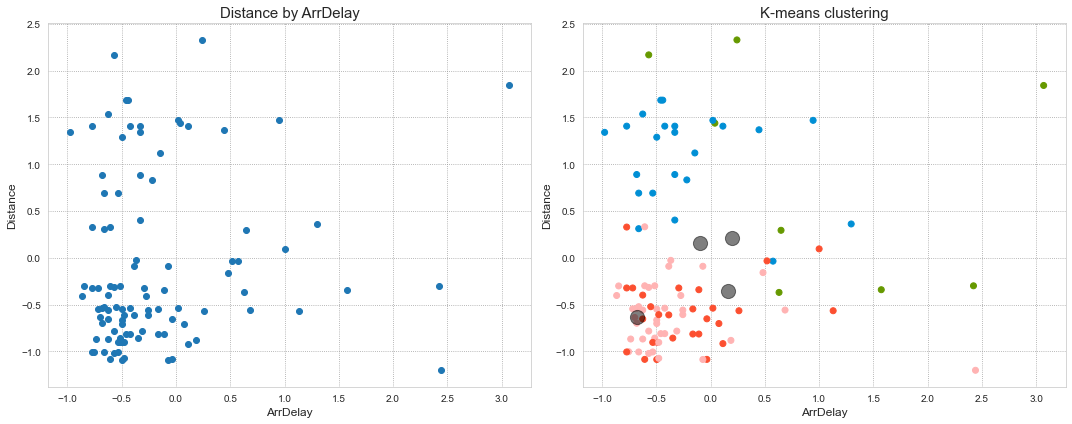

In [89]:
#visualisation of clusters, comparing values raw and clusters output
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
sns.set_style('whitegrid', {"grid.color": ".6", "grid.linestyle": ":"})

fte_colors1 = {0: "#008fd5",1: "#fc4f30",2: "#ffb3b3", 3:'#669900'}
km_colors = [fte_colors1[label] for label in model1.labels_]

axes[0].scatter(df_sample['ArrDelay'], df_sample['Distance'])
axes[0].set_xlabel("ArrDelay",fontsize = 12)
axes[0].set_ylabel("Distance",fontsize = 12)
axes[0].set_title("Distance by ArrDelay", fontsize = 15)

axes[1].scatter(df_sample['ArrDelay'], df_sample['Distance'], c=km_colors)
axes[1].scatter(centers1[:, 0], centers1[:, 1], c='black', s=200, alpha=0.5)
axes[1].set_xlabel("ArrDelay",fontsize = 12)
axes[1].set_ylabel("Distance",fontsize = 12)
axes[1].set_title("K-means clustering", fontsize = 15)

plt.tight_layout();

Conclusion:
- Cluster1 (blue) selects flights high Distance and low ArrDelay.
- Cluster2 (red) selects flights with low Distance and low ArrDelay.
- Cluster3 (pink) selects flights with medium Distance and low ArrDelay.
- Cluster4 (green) selects flights with low Distance and high ArrDelay.

#### Characteristics of each cluster

In [38]:
#new dataset with the clusters
cluster_map1 = pd.DataFrame()
cluster_map1['DataIndex'] = df_sample.index.values
cluster_map1['ArrDelay'] = df_sample.ArrDelay.values
cluster_map1['Distance'] = df_sample.ArrTime.values
cluster_map1['Cluster'] = model1.labels_
cluster_map1.head(3)

,DataIndex,ArrDelay,Distance,Cluster
0,569947,-0.570181,-2.907990,3
1,1479776,0.186823,-0.791635,2
2,1843691,-0.625571,0.870433,1


In [39]:
#select each group
cluster1 = cluster_map1[cluster_map1.Cluster == 0]
cluster2 = cluster_map1[cluster_map1.Cluster == 1]
cluster3 = cluster_map1[cluster_map1.Cluster == 2]
cluster4 = cluster_map1[cluster_map1.Cluster == 3]

In [40]:
#number of elements
elements1 = cluster1['DataIndex'].count()
elements2 = cluster2['DataIndex'].count()
elements3 = cluster3['DataIndex'].count()
elements4 = cluster4['DataIndex'].count()
print('Cluster 1 has:',elements1,'instances.', 'Cluster 2 has:',elements2,
      'instances.','Cluster 3 has:', elements3,'instances.', 'Cluster 4 has:', elements4,'instances.')

Cluster 1 has: 23 instances. Cluster 2 has: 28 instances. Cluster 3 has: 41 instances. Cluster 4 has: 8 instances.


In [41]:
cluster1.head(2)

,DataIndex,ArrDelay,Distance,Cluster
5,1936603,0.445312,-0.516144,0
7,369559,-0.533254,0.403375,0


In [42]:
cluster2.head(2)

,DataIndex,ArrDelay,Distance,Cluster
2,1843691,-0.625571,0.870433,1
9,728714,-0.496327,1.036457,1


In [43]:
cluster3.head(2)

,DataIndex,ArrDelay,Distance,Cluster
1,1479776,0.186823,-0.791635,2
3,1350452,-0.514790,-0.056384,2


In [44]:
cluster4.head(2)

,DataIndex,ArrDelay,Distance,Cluster
0,569947,-0.570181,-2.907990,3
20,369593,3.067129,-2.537628,3


In [45]:
#arithmetic mean of ArrDelay in cluster1
cluster1_indexes = list(cluster1['DataIndex'])
group1 = pd.DataFrame()

def myfunc1(x):
    global group1
    group1 = group1.append(df_flights.loc[[x]])
    return group1
    
for x in cluster1_indexes:
    myfunc1(x)
    
#arithmetic mean of ArrDelay in cluster2
cluster2_indexes = list(cluster2['DataIndex'])
group2 = pd.DataFrame()

def myfunc2(x):
    global group2
    group2 = group2.append(df_flights.loc[[x]])
    return group2
    
for x in cluster2_indexes:
    myfunc2(x)   

#arithmetic mean of ArrDelay in cluster3
cluster3_indexes = list(cluster3['DataIndex'])
group3 = pd.DataFrame()

def myfunc3(x):
    global group3
    group3 = group3.append(df_flights.loc[[x]])
    return group3
    
for x in cluster3_indexes:
    myfunc3(x) 

#arithmetic mean of ArrDelay in cluster4
cluster4_indexes = list(cluster4['DataIndex'])
group4 = pd.DataFrame()

def myfunc4(x):
    global group4
    group4 = group4.append(df_flights.loc[[x]])
    return group4
    
for x in cluster4_indexes:
    myfunc4(x) 

In [46]:
mean1 = group1['ArrDelay'].mean()
mean2 = group2['ArrDelay'].mean()
mean3 = group3['ArrDelay'].mean()
mean4 = group4['ArrDelay'].mean()
print('Arithmetic mean of ArrDelay in cluster 1:',mean1,'minits.')
print('Arithmetic mean of ArrDelay in cluster 2:',mean2,'minits.')
print('Arithmetic mean of ArrDelay in cluster 3:',mean3,'minits.')
print('Arithmetic mean of ArrDelay in cluster 4:',mean4,'minits.')

Arithmetic mean of ArrDelay in cluster 1: 28.043478260869566 minits.
Arithmetic mean of ArrDelay in cluster 2: 28.321428571428573 minits.
Arithmetic mean of ArrDelay in cluster 3: 19.390243902439025 minits.
Arithmetic mean of ArrDelay in cluster 4: 94.375 minits.


In [47]:
#standard deviation
std1 = statistics.stdev(cluster1['ArrDelay'])
std2 = statistics.stdev(cluster2['ArrDelay'])
std3 = statistics.stdev(cluster3['ArrDelay'])
std4 = statistics.stdev(cluster4['ArrDelay'])

print('Standard deviation of cluster 1:',std1)
print('Standard deviation of cluster 2:',std2)
print('Standard deviation of cluster 3:',std3)
print('Standard deviation of cluster 4:',std4)

Standard deviation of cluster 1: 0.5605919749182452
Standard deviation of cluster 2: 0.49287394536805773
Standard deviation of cluster 3: 0.5509873993304439
Standard deviation of cluster 4: 1.2445289361714158


Conclusion:
- Standard deviation measures how dispersed the data is in relation to the mean. 
- The cluste 4 has high standard deviation, it means that the flights in this group have more differences between the values of instances. 

## Level 2

### Exercise 2

#### Classification of flights with hierarchical clustering

In [48]:
model2 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
model2.fit_predict(df_sample)

array([0, 3, 1, 1, 3, 2, 3, 2, 2, 1, 3, 3, 0, 1, 1, 1, 3, 2, 1, 3, 0, 1,
       1, 1, 2, 3, 1, 3, 2, 3, 2, 3, 2, 1, 3, 3, 3, 1, 1, 0, 1, 3, 0, 3,
       3, 2, 1, 1, 3, 2, 0, 3, 3, 2, 0, 3, 1, 1, 3, 1, 3, 3, 1, 1, 2, 1,
       0, 3, 3, 3, 3, 0, 1, 2, 2, 0, 1, 3, 1, 3, 3, 2, 1, 1, 1, 0, 2, 0,
       3, 1, 1, 3, 2, 3, 1, 3, 3, 2, 2, 1])

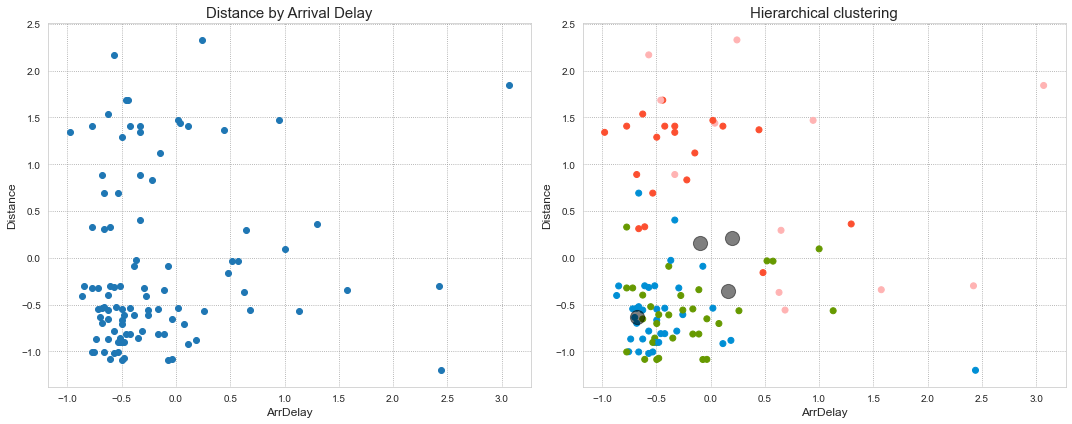

In [91]:
#visualisation of clusters, comparing values raw and clusters output
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
sns.set_style('whitegrid', {"grid.color": ".6", "grid.linestyle": ":"})
centers2 = model1.cluster_centers_

fte_colors2 = {0: "#ffb3b3",1: "#669900",2: "#fc4f30", 3:'#008fd5'}
hie_colors = [fte_colors2[label] for label in model2.labels_]

axes[0].scatter(df_sample['ArrDelay'], df_sample['Distance'])
axes[0].set_xlabel("ArrDelay",fontsize = 12)
axes[0].set_ylabel("Distance",fontsize = 12)
axes[0].set_title("Distance by Arrival Delay", fontsize = 15)

axes[1].scatter(df_sample['ArrDelay'], df_sample['Distance'], c=hie_colors)
axes[1].scatter(centers2[:, 0], centers2[:, 1], c='black', s=200, alpha=0.5)
axes[1].set_xlabel("ArrDelay",fontsize = 12)
axes[1].set_ylabel("Distance",fontsize = 12)
axes[1].set_title("Hierarchical clustering", fontsize = 15)

plt.tight_layout();

Conclusion:
- Cluster1 (blue) selects flights with low Distance and low ArrDelay.
- Cluster2 (red) selects flights with high Distance and low ArrDelay.
- Cluster3 (pink) selects flights outliers.
- Cluster4 (green) selects flights with low Distance and medium ArrDelay.

#### Characteristics of each cluster

In [50]:
#new dataset with the clusters
cluster_map2 = pd.DataFrame()
cluster_map2['DataIndex'] = df_sample.index.values
cluster_map2['ArrDelay'] = df_sample.ArrDelay.values
cluster_map2['Distance'] = df_sample.ArrTime.values
cluster_map2['Cluster'] = model2.labels_
cluster_map2.head(3)

,DataIndex,ArrDelay,Distance,Cluster
0,569947,-0.570181,-2.907990,0
1,1479776,0.186823,-0.791635,3
2,1843691,-0.625571,0.870433,1


In [51]:
#select each group
cluster1_AC = cluster_map2[cluster_map2.Cluster == 0]
cluster2_AC = cluster_map2[cluster_map2.Cluster == 1]
cluster3_AC = cluster_map2[cluster_map2.Cluster == 2]
cluster4_AC = cluster_map2[cluster_map2.Cluster == 3]

In [52]:
#number of elements
elements1_AC = cluster1_AC['DataIndex'].count()
elements2_AC = cluster2_AC['DataIndex'].count()
elements3_AC = cluster3_AC['DataIndex'].count()
elements4_AC = cluster4_AC['DataIndex'].count()
print('Cluster 1 has:',elements1_AC,'instances.', 'Cluster 2 has:',elements2_AC,
      'instances.','Cluster 3 has:', elements3_AC,'instances.', 'Cluster 4 has:', elements4_AC,'instances.')

Cluster 1 has: 12 instances. Cluster 2 has: 33 instances. Cluster 3 has: 19 instances. Cluster 4 has: 36 instances.


In [53]:
#standard deviation
std1_AC = statistics.stdev(cluster1_AC['ArrDelay'])
std2_AC = statistics.stdev(cluster2_AC['ArrDelay'])
std3_AC = statistics.stdev(cluster3_AC['ArrDelay'])
std4_AC = statistics.stdev(cluster4_AC['ArrDelay'])

print('Standard deviation of cluster 1:',std1_AC)
print('Standard deviation of cluster 2:',std2_AC)
print('Standard deviation of cluster 3:',std3_AC)
print('Standard deviation of cluster 4:',std4_AC)

Standard deviation of cluster 1: 1.1296391486500643
Standard deviation of cluster 2: 0.4774420672784552
Standard deviation of cluster 3: 0.5409477314097181
Standard deviation of cluster 4: 0.5480504477118833


Conclusion:
- Cluster 1 has the highest standart deviation.
- This cluster contains instances with values which are very far from each other.

## Level 3

### Exercise 3

##### Evaluate the clusters + appropriate number of clusters

#### K-means: Choosing the appropriate number of clusters - Elbow method

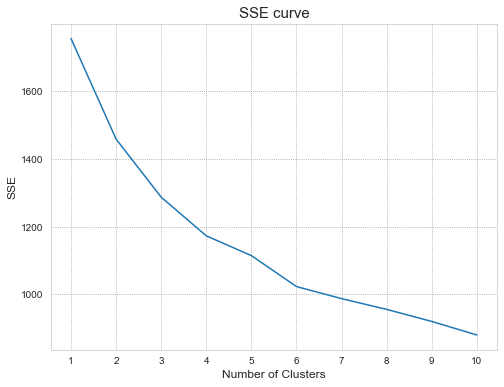

In [99]:
kmeans_kwargs = {"init": "random","n_init": 10,"random_state": 42}
sse = []
for k in range(1, 11):
    model1elbow = KMeans(n_clusters=k, **kmeans_kwargs)
    model1elbow.fit(df_sample)
    sse.append(model1elbow.inertia_)

plt.figure(figsize=(8, 6)) 
sns.set_style('whitegrid', {"grid.color": ".6", "grid.linestyle": ":"})
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.title("SSE curve", fontsize = 15)
plt.xlabel("Number of Clusters",fontsize = 12)
plt.ylabel("SSE",fontsize = 12)
plt.show()

In [93]:
#when determining the elbow point in the SSE curve is not so straightforward, use of library kneed
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

4

Interpretation:
- The elbow is located at x=4, that means we can use 4 clusters for K-means clustering to get the optimum result. However the result is not so straightforward from the SSE curve.

#### K-means: Choosing the appropriate number of clusters - Silhouette coefficient

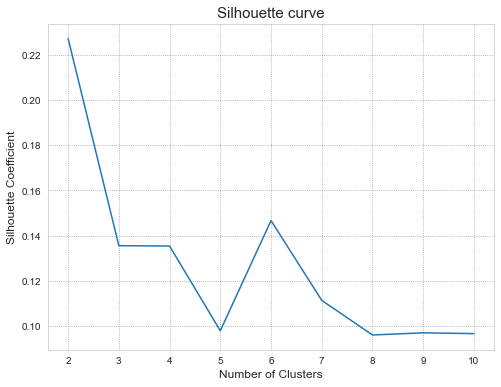

In [100]:
silhouette_coefficients = []
for k in range(2, 11):
    model1silhouette = KMeans(n_clusters=k, **kmeans_kwargs)
    model1silhouette.fit(df_sample)
    score1 = silhouette_score(df_sample, model1silhouette.labels_)
    silhouette_coefficients.append(score1)

plt.figure(figsize=(8, 6)) 
sns.set_style('whitegrid', {"grid.color": ".6", "grid.linestyle": ":"})
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.title("Silhouette curve", fontsize = 15)
plt.xlabel("Number of Clusters",fontsize = 12)
plt.ylabel("Silhouette Coefficient",fontsize = 14)
plt.show()

#### Hierarchical clustering evaluation

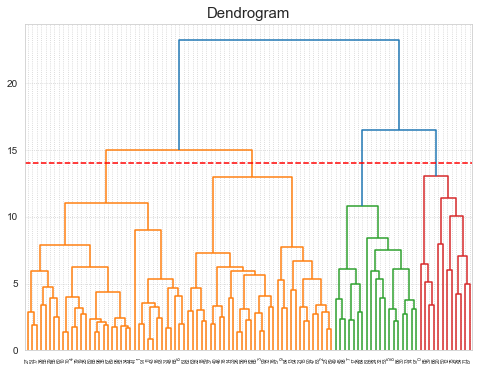

In [101]:
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid', {"grid.color": ".8", "grid.linestyle": ":"})
plt.rcParams['lines.linewidth'] = 1.5
plt.title("Dendrogram", fontsize = 15)  
dend = shc.dendrogram(shc.linkage(df_sample, method='ward'))
plt.axhline(y=14, color='r', linestyle='--')
plt.show()

Interpretation:
- If we choose threshold y=18 the line cuts the dendrogram in 4 points - that indicates the number of clusters. This threshold was applied in the process of clustering.

#### Choosing the appropriate number of clusters - Advanced Techniques

In [63]:
#k-means with 2 clusters
model3 = KMeans(n_clusters=2)
model3.fit(df_sample)
#dbscan - eps is the distance between two samples - neighborhood
model4 = DBSCAN(eps=4)
model4.fit(df_sample)

DBSCAN(eps=4)

In [64]:
#arbitrary assigned numbers to clusters
model3.labels_

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0], dtype=int32)

In [65]:
#arbitrary assigned numbers to clusters
model4.labels_ = abs(model4.labels_)
model4.labels_ 

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [66]:
kmeans_silhouette1 = silhouette_score(df_sample, model3.labels_).round(2)
dbscan_silhouette1 = silhouette_score(df_sample, model4.labels_).round(2)
print(kmeans_silhouette1,dbscan_silhouette1)

0.23 0.28


In [67]:
# selecting the same size for plots and same columns as before so we can compare
a = df_sample['ArrDelay']
b = df_sample['AirTime']

In [68]:
print(a.size, b.size)

100 100


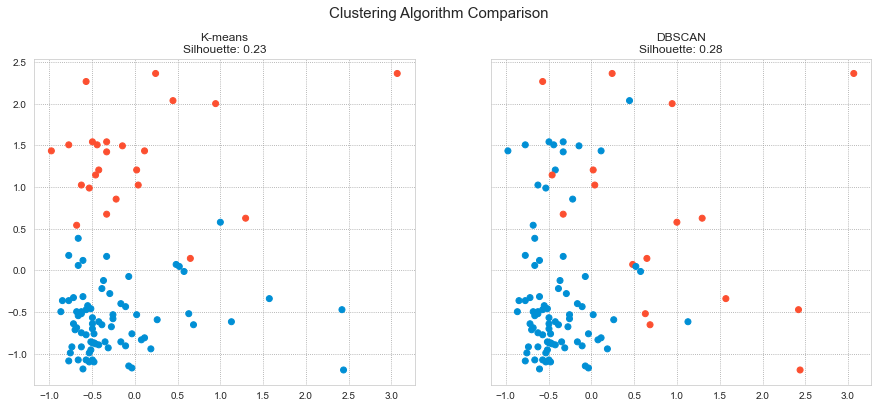

In [97]:
#plot the data and cluster silhouette comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharex=True, sharey=True)
fig.suptitle("Clustering Algorithm Comparison", fontsize=15, y=1)
fte_colors1 = {0: "#008fd5",1: "#fc4f30"}
fte_colors2 = {0: "#008fd5",1: "#fc4f30"}

#the kmeans plot
km_colors = [fte_colors1[label] for label in model3.labels_]
ax1.scatter(a, b, c=km_colors)

ax1.set_title(f"K-means\nSilhouette: {kmeans_silhouette1}",fontsize=12)
#the dbscan plot
db_colors = [fte_colors2[label] for label in model4.labels_]
ax2.scatter(a, b, c=db_colors)
ax2.set_title(f"DBSCAN\nSilhouette: {dbscan_silhouette1}",fontsize=12)

plt.show()

Interpretation:
- Silhouette coefficient is representing how close or far data pointa are to each other in one cluster. 1 is the best vaule and -1 is the worst.
- DBSCAN appears to have very similar result as K-means.
- Silhouette coefficient is better in Density based spacial clustering than in K-means.

### PCA: Reducing the dimension

We can reduce the whole dataset to 2D and than perform clustering.

In [128]:
dfScaled.head(3)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
95860,-1.616416,-0.089056,-1.017683,0.470116,0.584210,0.523789,0.590595,-0.628063,-0.398670,-0.507976,...,-0.565011,-0.593653,-0.49161,-0.01356,-0.065566,-1.048705e-16,-3.581207e-17,0.000000,0.000000,0.000000
95861,-1.616416,-0.089056,-1.017683,-0.614940,-0.589394,-0.381135,-0.669609,-0.534841,-0.643516,-0.604552,...,-0.537663,-0.129618,0.30779,-0.01356,-0.065566,-7.473814e-02,-1.865298e-01,-0.264767,-0.021751,-0.710433
95862,-1.616416,-0.089056,-1.017683,-1.101493,-1.172777,-0.751497,-0.956218,-0.266827,-0.118846,-0.338969,...,-0.436904,-0.593653,0.55376,-0.01356,-0.065566,-1.048705e-16,-3.581207e-17,0.000000,0.000000,0.000000


In [129]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dfScaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [130]:
df_sample2 = principalDf.sample(n = 100)

#### Classification of flights with K-means after rescaling with PCA

In [131]:
#how many clusters?
kmeans_kwargs = {"init": "random","n_init": 10,"random_state": 42}
sse = []
for k in range(1, 11):
    model5elbow = KMeans(n_clusters=k, **kmeans_kwargs)
    model5elbow.fit(df_sample2)
    sse.append(model5elbow.inertia_)
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

3

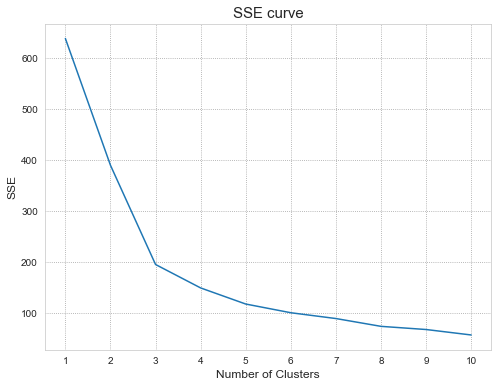

In [132]:
#SSE curve or error to check number of clusters
kmeans_kwargs = {"init": "random","n_init": 10,"random_state": 42}
sse = []
for k in range(1, 11):
    model5elbow = KMeans(n_clusters=k, **kmeans_kwargs)
    model5elbow.fit(df_sample2)
    sse.append(model5elbow.inertia_)

plt.figure(figsize=(8, 6)) 
sns.set_style('whitegrid', {"grid.color": ".6", "grid.linestyle": ":"})
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.title("SSE curve", fontsize = 15)
plt.xlabel("Number of Clusters",fontsize = 12)
plt.ylabel("SSE",fontsize = 12)
plt.show()

Conclusion: The best division will be in 3 clusters.

In [133]:
#k-means
model5 = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42)
model5.fit(df_sample2)

KMeans(init='random', n_clusters=3, random_state=42)

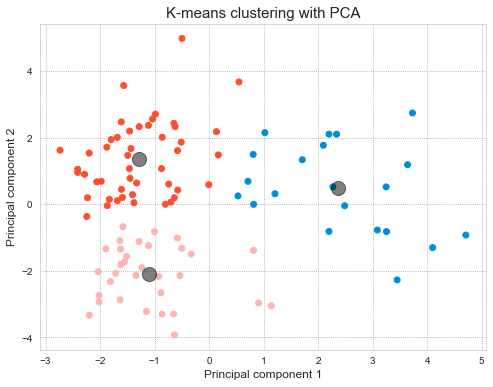

In [134]:
#visualisation of clusters
centers5 = model5.cluster_centers_

plt.figure(figsize=(8, 6)) 
sns.set_style('whitegrid', {"grid.color": ".6", "grid.linestyle": ":"})
fte_colors1 = {0: "#fc4f30",1: "#ffb3b3",2: "#008fd5"}
km_colors2 = [fte_colors1[label] for label in model5.labels_]

plt.scatter(df_sample2['principal component 1'], df_sample2['principal component 2'], c=km_colors2)
plt.scatter(centers5[:, 0], centers5[:, 1], c='black', s=200, alpha=0.5)
plt.title("K-means clustering with PCA", fontsize = 15)
plt.xlabel("Principal component 1",fontsize = 12)
plt.ylabel("Principal component 2",fontsize = 12)
plt.show()

#### Classification of flights with hierarchical clustering with PCA

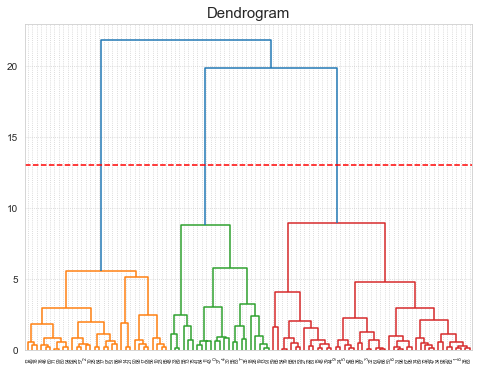

In [135]:
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid', {"grid.color": ".8", "grid.linestyle": ":"})
plt.rcParams['lines.linewidth'] = 1.5
plt.title("Dendrogram", fontsize = 15)  
dend = shc.dendrogram(shc.linkage(df_sample2, method='ward'))
plt.axhline(y=13, color='r', linestyle='--')
plt.show()

For the value y=13, the threshold line cuts dendrogram in 3 parts - 3 clusters.

In [136]:
model6 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
model6.fit_predict(df_sample2)

array([2, 0, 1, 0, 2, 0, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1, 1, 2, 2, 0, 1,
       0, 1, 0, 1, 1, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2,
       0, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0, 2, 1, 1, 2, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 2, 1, 1, 0, 2, 0, 2, 1, 1, 1, 0, 1, 0, 1, 2, 2, 1, 1, 0,
       0, 0, 1, 2, 0, 1, 1, 0, 0, 1, 1, 1])

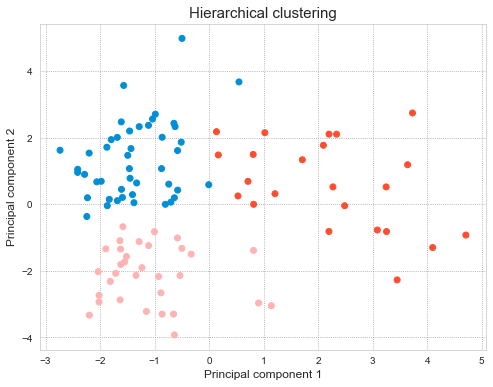

In [137]:
#visualisation of clusters
plt.figure(figsize=(8, 6)) 
sns.set_style('whitegrid', {"grid.color": ".6", "grid.linestyle": ":"})
fte_colors = {0: "#008fd5",1: "#ffb3b3",2: "#fc4f30"}

hie_colors2 = [fte_colors[label] for label in model6.labels_]
plt.scatter(df_sample2['principal component 1'], df_sample2['principal component 2'], c=hie_colors2)
plt.title("Hierarchical clustering", fontsize = 15)
plt.xlabel("Principal component 1",fontsize = 12)
plt.ylabel("Principal component 2",fontsize = 12)
plt.show()

#### Classification DBSCAN with PCA

In [138]:
#dbscan - eps is the distance between two samples - neighborhood
model7 = DBSCAN(eps=2.5)
model7.fit(df_sample)

DBSCAN(eps=2.5)

In [139]:
model7.labels_ = abs(model7.labels_)
model7.labels_ 

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

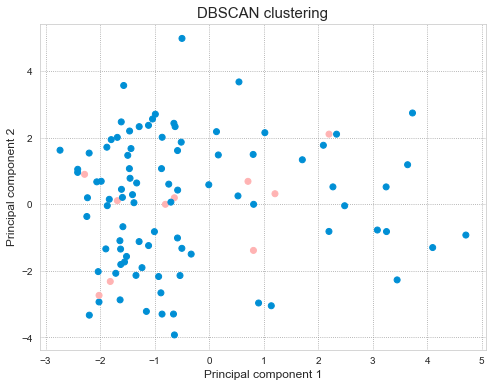

In [140]:
#visualisation of clusters
plt.figure(figsize=(8, 6)) 
sns.set_style('whitegrid', {"grid.color": ".6", "grid.linestyle": ":"})
fte_colors = {0: "#ffb3b3",1: "#008fd5",2: "#fc4f30"}

hie_colors2 = [fte_colors[label] for label in model7.labels_]
plt.scatter(df_sample2['principal component 1'], df_sample2['principal component 2'], c=hie_colors2)
plt.title("DBSCAN clustering", fontsize = 15)
plt.xlabel("Principal component 1",fontsize = 12)
plt.ylabel("Principal component 2",fontsize = 12)
plt.show()

In [141]:
kmeans_silhouette2 = silhouette_score(df_sample2, model5.labels_).round(2)
hierarchical_silhouette2 = silhouette_score(df_sample2, model6.labels_).round(2)
dbscan_silhouette2 = silhouette_score(df_sample2, model7.labels_).round(2)
print(kmeans_silhouette2,hierarchical_silhouette2,dbscan_silhouette2)

0.48 0.47 -0.07


In [142]:
c = df_sample2['principal component 1']
d = df_sample2['principal component 2']

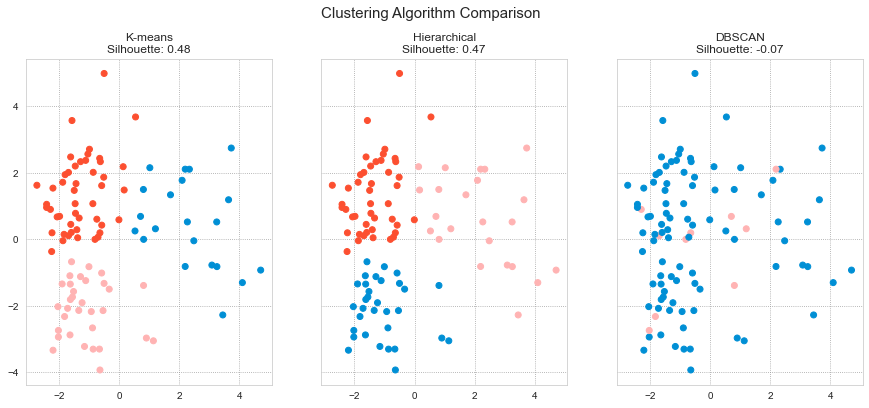

In [143]:
#plot the data and cluster silhouette comparison
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6), sharex=True, sharey=True)
fig.suptitle("Clustering Algorithm Comparison", fontsize=15, y=1)
fte_colors5 = {0: "#fc4f30",1: "#ffb3b3",2: "#008fd5"}
fte_colors6 = {0: "#fc4f30",1: "#008fd5",2: "#ffb3b3"}
fte_colors7 = {0: "#ffb3b3",1: "#008fd5",2: "#fc4f30",3: "#fc4f30"}

#the k-means plot
km_colors = [fte_colors5[label] for label in model5.labels_]
ax1.scatter(c, d, c=km_colors)
ax1.set_title(f"K-means\nSilhouette: {kmeans_silhouette2}",fontsize=12)
#the hierarchical plot
hie_colors = [fte_colors6[label] for label in model6.labels_]
ax2.scatter(c, d, c=hie_colors)
ax2.set_title(f"Hierarchical\nSilhouette: {hierarchical_silhouette2}",fontsize=12)
#the dbscan plot
db_colors = [fte_colors7[label] for label in model7.labels_]
ax3.scatter(c, d, c=db_colors)
ax3.set_title(f"DBSCAN\nSilhouette: {dbscan_silhouette2}",fontsize=12)

plt.show()

Conclusion:
- Hierarchical clustering and K-means gives better results than DBSCAN. 
- DBSCAN is not performing well because data are overlapped.

#### Building a K-Means Clustering Pipeline

Process:
- Change the data to have flight-numbers also inside the scaled dataset.
- Cluster assignation to each particular flight.

In [144]:
#repeting some parts of data processing from before
#selecting 
df_flights = df.loc[df['UniqueCarrier'] == 'DL']

#clean the data, feature I will not use, for clustering I will select only numeric features
df_flights.drop(['Unnamed: 0','Year','TailNum','CancellationCode','UniqueCarrier'],axis=1, inplace=True)

#list of all airports
first_list = cat_df_flights['Origin'].tolist()
second_list = cat_df_flights['Dest'].tolist()
resultList= list(set(first_list) | set(second_list))
labels = resultList

replace_map1 = {'Origin' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
replace_map2 = {'Dest' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

df_flights.replace(replace_map1, inplace=True)
df_flights.replace(replace_map2, inplace=True)
print(df_flights['Origin'],df_flights['Dest'])

#calculating mean value for missing data
def myfunc(x):
    df_flights[x]=df_flights[x].fillna(df_flights[x].mean())

mylist = ['ArrTime','ActualElapsedTime','AirTime','ArrDelay',
          'TaxiIn','TaxiOut','CarrierDelay','WeatherDelay',
          'NASDelay','SecurityDelay','LateAircraftDelay']
for x in mylist:
    myfunc(x)

95860      89
95861       9
95862      53
95863      81
95864      10
           ..
1936753    66
1936754    57
1936755     9
1936756    72
1936757    79
Name: Origin, Length: 114238, dtype: int64 95860       9
95861      14
95862       9
95863      10
95864      89
           ..
1936753     9
1936754     9
1936755    26
1936756     9
1936757     9
Name: Dest, Length: 114238, dtype: int64


In [145]:
x = df_flights.drop('FlightNum',axis=1)
y = df_flights['FlightNum']

In [146]:
#standartization
scaler = StandardScaler()
dfScaled2 = x
dfScaled2[dfScaled2.columns] = scaler.fit_transform(dfScaled2[dfScaled2.columns])
dfScaled2.head(3)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
95860,-1.616416,-0.089056,-1.017683,0.470116,0.584210,0.523789,0.590595,-0.628063,-0.398670,-0.507976,...,-0.565011,-0.593653,-0.49161,-0.01356,-0.065566,-1.048705e-16,-3.581207e-17,0.000000,0.000000,0.000000
95861,-1.616416,-0.089056,-1.017683,-0.614940,-0.589394,-0.381135,-0.669609,-0.534841,-0.643516,-0.604552,...,-0.537663,-0.129618,0.30779,-0.01356,-0.065566,-7.473814e-02,-1.865298e-01,-0.264767,-0.021751,-0.710433
95862,-1.616416,-0.089056,-1.017683,-1.101493,-1.172777,-0.751497,-0.956218,-0.266827,-0.118846,-0.338969,...,-0.436904,-0.593653,0.55376,-0.01356,-0.065566,-1.048705e-16,-3.581207e-17,0.000000,0.000000,0.000000


In [147]:
#join datasets
df_final = pd.concat([dfScaled2, y], axis=1)
df_final.head(3)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,...,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FlightNum
95860,-1.616416,-0.089056,-1.017683,0.470116,0.584210,0.523789,0.590595,-0.628063,-0.398670,-0.507976,...,-0.593653,-0.49161,-0.01356,-0.065566,-1.048705e-16,-3.581207e-17,0.000000,0.000000,0.000000,1079
95861,-1.616416,-0.089056,-1.017683,-0.614940,-0.589394,-0.381135,-0.669609,-0.534841,-0.643516,-0.604552,...,-0.129618,0.30779,-0.01356,-0.065566,-7.473814e-02,-1.865298e-01,-0.264767,-0.021751,-0.710433,1099
95862,-1.616416,-0.089056,-1.017683,-1.101493,-1.172777,-0.751497,-0.956218,-0.266827,-0.118846,-0.338969,...,-0.593653,0.55376,-0.01356,-0.065566,-1.048705e-16,-3.581207e-17,0.000000,0.000000,0.000000,1135


In [148]:
#new sample of 10 values and changing to arrays
df_sample3 = df_final.sample(n = 10)
data = df_sample3.to_numpy()
data.shape

(10, 25)

In [149]:
x = list(y)
true_label_names = np.array(df_sample3['FlightNum'])
true_label_names.shape

(10,)

In [150]:
#converting the abbreviations of labels to integers with LabelEncoder
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(true_label_names)
true_labels[:5]

array([2, 6, 9, 3, 0])

In [151]:
label_encoder.classes_

array([  61,  403,  731,  748,  820,  850, 1018, 1039, 1265, 1489])

In [152]:
n_clusters = len(label_encoder.classes_)

In [153]:
#preprocessing pipeline with PCA
preprocessor = Pipeline([("scaler", MinMaxScaler()),("pca", PCA(n_components=2, random_state=42))])

In [154]:
#k-means clustering with constructor
clusterer = Pipeline([("kmeans",KMeans(n_clusters=3,
                                       init="random",n_init=10,
                                       max_iter=500,random_state=42))])

In [155]:
#end-to-end pipline
pipe = Pipeline([("preprocessor", preprocessor),("clusterer", clusterer)])
pipe.fit(data)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(init='random', max_iter=500,
                                         n_clusters=3, random_state=42))]))])

In [156]:
preprocessed_data = pipe["preprocessor"].transform(data)
predicted_labels = pipe["clusterer"]["kmeans"].labels_
silhouette_score(preprocessed_data, predicted_labels).round(2)

0.61

In [157]:
true_labels.shape

(10,)

In [158]:
predicted_labels.shape

(10,)

In [159]:
adjusted_rand_score(true_labels, predicted_labels)

0.0

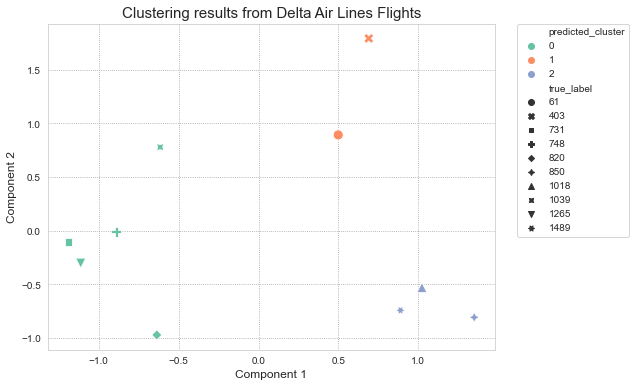

In [160]:
plt.figure(figsize=(8, 6)) 
sns.set_style('whitegrid', {"grid.color": ".6", "grid.linestyle": ":"})

pcadf = pd.DataFrame(
    pipe["preprocessor"].transform(data),
    columns=["component_1", "component_2"])

pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
pcadf["true_label"] = label_encoder.inverse_transform(true_labels)

scat = sns.scatterplot(
    "component_1",
    "component_2",
    s=100,
    data=pcadf,
    hue="predicted_cluster",
    style="true_label",
    palette="Set2")

scat.set_title("Clustering results from Delta Air Lines Flights", fontsize=15)
plt.xlabel("Component 1",fontsize=12)
plt.ylabel("Component 2",fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()

Conclusion:
- Pipline can help to do several steps together: PCA, clustering and fitting data.
- The diagram showing each flight assignation would be interesting for further study - for exemple we could compare flight samples of two and more companies.
- Also with this diagram, we could study un more detail the characteristics of each cluster.

#### Notes
* ML Unsupervised algorithms
    - https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68
* K-Means and evaluation techniques
    - https://realpython.com/k-means-clustering-python/
* Hierarchical Agglomerative Clustering
    - https://towardsdatascience.com/machine-learning-algorithms-part-12-hierarchical-agglomerative-clustering-example-in-python-1e18e0075019
    - https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/
* PCA
    - https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
    - https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html